In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc

<strong>Preprocess</strong>

Train and test split

In [2]:
feature_matrix = np.load("feature_matrix.npy")

X = feature_matrix[:, :-1]
y = feature_matrix[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scale training and test features

In [3]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

Perform PCA

In [4]:
pca = PCA(n_components=346)

X_train_pca = pca.fit_transform(X_train_ss)
X_test_pca = pca.fit_transform(X_test_ss)

<strong>Train and Test</strong>

Apply Support Vector Machine

In [5]:
svm = SVC(kernel="linear", probability=True, random_state=42)

svm.fit(X_train_pca, y_train)

y_pred = svm.predict(X_test_pca)

<strong>Evaluation<strong>

Accuracy

In [43]:
accuracy_score(y_test, y_pred)

0.5549132947976878

ROC and AUC

Text(0, 0.5, 'True Positive Rate')

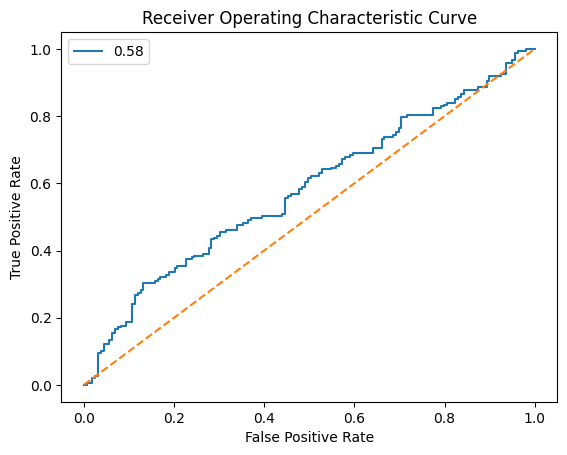

In [ ]:
y_test_prob = svm.predict_proba(X_test_pca)

apis_prob = y_test_prob[:, 0]

fpr, tpr, threshold = roc_curve(y_test, apis_prob, pos_label=0)

roc_auc = auc(fpr, tpr)

roc_plot = plt.plot(fpr, tpr, label=f"{roc_auc:0.2f}")

plt.legend(loc=0)
plt.plot([0, 1], [0, 1], ls='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")